This notebook contains code to evaluate SISTR2 selection inferences based on varying numbers of input STR loci

In [1]:
%pylab inline
import glob
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from Joint_method_functions import *
from Per_locus_validation_functions import *

PLOTDIR = 'pdfs-round1'
SUPP_PREFIX = 'SuppFig5-'
RESFOLDER = '/gymreklab-tscc/bonnieh/joint_method/results_validation_top_x'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def main():
    
    means = [10**-5, 10**-4, 10**-3, 10**-2] 
    #means = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]
    #means = [10**-5, 10**-4.5, 10**-4, 10**-3.5, 10**-3, 10**-2.5, 10**-2]
    per_opt_combos = [(3,5),(2,11),(3,13)]#,(2,20),(4,7),(4,10)]
    color_list = ['deepskyblue','blue','lightgreen','green','lightpink','deeppink','C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    
    fig_num = 0
    plot_med = True
    fig_num = fig_num + 1
    color_num = -1
    
    mut_params_dic = {}
    mut_params_dic[(3,5)] = 'Period 3 Optimal allele 5: Baseline mutation rate 10^-5.5' #, p=0.9, L=0.33'
    mut_params_dic[(3,13)] = 'Period 3 Optimal allele 13: Baseline mutation rate 10^-3' #, p=0.9, L=0.33'
    mut_params_dic[(2,11)] = 'Period 2 Optimal allele 11: Baseline mutation rate 10^-4.25' #, p=0.6, L=0.15'
    mut_params_dic[(2,20)] = 'Period 2 Optimal allele 20: Baseline mutation rate 10^-3'#'mu=10^-3, p=0.6, L=0.15'
    mut_params_dic[(4,7)] = 'Period 4 Optimal allele 7: Baseline mutation rate 10^-4.2'#'mu=10^-4.2, p=0.9, L=0.45'
    mut_params_dic[(4,10)] = 'Period 4 Optimal allele 10: Baseline mutation rate 10^-3'#'mu=10^-3, p=0.9, L=0.45'
    
    # Parameters
    model = 'eurodem_prior2'
    eps_het_numerator = 0.005
    eps_het_denominator =3
    eps_bins=0.3
    constant_common = 1
    denom_common = 1
    use_het = 'y'
    use_common = 'n'
    use_bins = 'y'
    num_bins = 5

    # Preprocess simulation lookup table
    # Get simulation tables
    sim_tables = {}
    ABC_tables = {}
    for per_opt_combo in per_opt_combos:

        file = '/gymreklab-tscc/bonnieh/abc/results/' + model + '/' + str(per_opt_combo[0]) + '_' + str(per_opt_combo[1]) + '.txt'  
        table = GetABCList(file, num_bins)
        dic_summ_stats = {}

        # Fill in dic_summ_stats: Key is s, value is list of (het, number of common alleles, bins) for given s value
        for combo in table:
            s_round = get_LRT_bin(combo[0])
            if s_round not in dic_summ_stats:
                dic_summ_stats[s_round] = []
            dic_summ_stats[s_round].append(combo[3]) # Append het, number of common alleles, bins for s value

        
        sim_tables[per_opt_combo] = dic_summ_stats

        # Preprocess ABC lookup table
        # Get ABC tables
        
        ABC_tables[per_opt_combo] = table
    
    for i in range(0,1):
        for combo in per_opt_combos:
            per = combo[0]
            opt = combo[1]
            color_num = color_num + 1
            list_of_mean = []
            list_of_med_of_med = []
            errors = []
            legend_labels = []

            x = means
            x = []
            for elem in means:
                x.append(np.log10(elem))
            means_1000 = []
            means_100 = []
            means_10 = []
            means_per_locus = []
            print('(a, number of loci, mean)')
            for mean in means:
                for j in range(2,3):
                    
                    folder = 'bin_agnostic_1000'
                    file_list = glob.glob('/gymreklab-tscc/bonnieh/joint_method/results_validation_top_x/%s/per_%d_opt_%d_*_%.8f.txt'%(folder, per, opt, mean))
                    file_list.sort()
                    
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    # Line 4 is mean of medians
                    line = lines[4]       
                    info = line.strip().split(': ')
                    est_mean = float(info[1])
                    means_1000.append(np.log10(est_mean))
                    
                    line = lines[1]
                    info = line.strip().split(' ')
                    k = float(info[7])
                    theta = float(info[10])
                    print((k,1000,mean))
                    
                    file_list = glob.glob('/gymreklab-tscc/bonnieh/joint_method/results_validation_top_x/%s/per_%d_opt_%d_*_%.8f.txt'%('bin_agnostic_100', per, opt, mean))  #48
                    file_list.sort()
                       
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    # Line 4 is mean of medians
                    line = lines[4]       
                    info = line.strip().split(': ')
                    est_mean = float(info[1])
                    means_100.append(np.log10(est_mean))
                    
                    line = lines[1]
                    info = line.strip().split(' ')
                    k = float(info[7])
                    theta = float(info[10])
                    print((k,100,mean))
                    
                    file_list = glob.glob('%s/%s/per_%d_opt_%d_*_%.8f.txt'%(RESFOLDER, 'bin_agnostic_10', per, opt, mean))  #49
                    file_list.sort()
                    
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    # Line 4 is mean of medians
                    line = lines[4]       
                    info = line.strip().split(': ')
                    est_mean = float(info[1])
                    means_10.append(np.log10(est_mean))
                    
                    line = lines[1]
                    info = line.strip().split(' ')
                    k = float(info[7])
                    theta = float(info[10])
                    print((k,10,mean))
                        
                    plt.figure(fig_num)  

                    # Per locus calculations
                    
                    s_vals = []
                    for c in range(0, 20):
                        s_val_drawn = mean #np.random.gamma(k, theta)
                        s_vals.append(s_val_drawn)
                        
                    s_est = []
                    for s in s_vals:

                        dic_summ_stats = sim_tables[(per, opt)] 
                        s_round = get_LRT_bin(s)

                        if s_round not in dic_summ_stats:
                            s_list_available = []
                            for elem in dic_summ_stats:
                                s_list_available.append(elem)
                            s_round = getNearestS(s_round, s_list_available)

                        table = dic_summ_stats[s_round]
                        allele_freqs = random.choice(table)
                        freq_string = ','.join(str(round(item, 5)) for item in allele_freqs)

                        # Add 0s to allele frequency list if number of alleles less than number of bins
                        if len(allele_freqs) < num_bins:
                            num_zeros_to_add = int((num_bins - len(allele_freqs))/2)
                            for i in range(0, num_zeros_to_add):
                                freq_string = '0.0,' + freq_string
                                freq_string = freq_string + ',0.0'

                        # Get summary stats
                        obs_het, obs_common, obs_bins = GetSummStats(freq_string, num_bins)

                        # Read abcFile line by line and place in lookup table in the form of a list
                        abc_list = ABC_tables[(per, opt)]

                        # Perform ABC
                        s_ABC, lower_bound, upper_bound, num_accepted, s_accepted = Get_S_ABC(abc_list, 
                                                        obs_het, obs_common, obs_bins, eps_het_numerator, 
                                                        eps_het_denominator, constant_common, denom_common, eps_bins, use_het, 
                                                        use_common, use_bins)
                        if s_ABC < 10**-5:
                            s_ABC = 10**-5
                        #else:
                            #s_ABC = round(s_ABC, 5)
                        if s_ABC != -1:
                            s_est.append(np.log10(s_ABC))

                    means_per_locus.append(np.mean(s_est))
            plt.plot(x, means_1000, marker = 'o',label = 'Joint method 1000 loci')
            plt.plot(x, means_100, marker = 'o',label = 'Joint method 100 loci')
            plt.plot(x, means_10, marker = 'o',label = 'Joint method 10 loci')
            plt.plot(x, means_per_locus, marker = 'o', label = 'Per-locus method')
            
            plt.plot( [-6,-1],[-6,-1],color='black' )
            print('Means for 1000 loci')
            print(means_1000)
            print('Means for 100 loci')
            print(means_100)
            print('Means for 10 loci')
            print(means_10)
            print('Means for per-locus estimates')
            print(means_per_locus)
            plt.xlim(-5.2, -1.8)
            
            plt.ylim(-7, -1)

            plt.title( '%s'%(mut_params_dic[(per,opt)]) + '\n' + 'a=' + str(k) + ' for joint method' ,fontsize=15) #'Distribution of s values: per-locus method\n' +
            plt.xlabel('log s', fontsize=15)
            
            plt.ylabel('Estimated log s',fontsize=15)
            plt.xticks(fontsize=15) 
            plt.yticks(fontsize=15)
            plt.legend()
            plt.savefig(os.path.join(PLOTDIR, SUPP_PREFIX + 'num_loci_per_%d_opt_%d_a_%.2f_log.pdf'%(per,opt,k)),bbox_inches='tight')
            plt.show()

(a, number of loci, mean)
(0.6, 1000, 1e-05)
(0.6, 100, 1e-05)
(0.6, 10, 1e-05)
(0.6, 1000, 0.0001)
(0.6, 100, 0.0001)
(0.6, 10, 0.0001)
(0.6, 1000, 0.001)
(0.6, 100, 0.001)
(0.6, 10, 0.001)
(0.6, 1000, 0.01)
(0.6, 100, 0.01)
(0.6, 10, 0.01)
Means for 1000 loci
[-4.706629773541959, -3.8729102745060278, -2.9817078185456056, -2.009837312343548]
Means for 100 loci
[-4.223016816827811, -3.6395504366639058, -2.7449971767973436, -2.001217358937436]
Means for 10 loci
[-3.3526277540530005, -2.998860351189654, -2.690882876872309, -2.1935292128533956]
Means for per-locus estimates
[-3.795623267027333, -3.7609319832595745, -3.6991619566091893, -3.290144525896711]


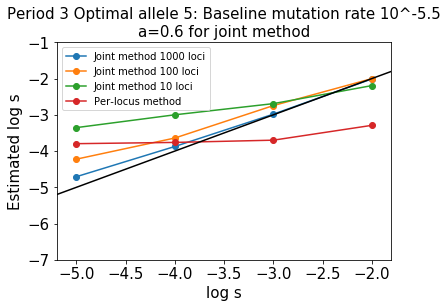

(a, number of loci, mean)
(0.6, 1000, 1e-05)
(0.6, 100, 1e-05)
(0.6, 10, 1e-05)
(0.6, 1000, 0.0001)
(0.6, 100, 0.0001)
(0.6, 10, 0.0001)
(0.6, 1000, 0.001)
(0.6, 100, 0.001)
(0.6, 10, 0.001)
(0.6, 1000, 0.01)
(0.6, 100, 0.01)
(0.6, 10, 0.01)
Means for 1000 loci
[-4.84563031533821, -4.012967619194388, -2.992663447895733, -1.9954794687432167]
Means for 100 loci
[-4.520627558012113, -4.1144583947461015, -2.98609055245736, -2.000930900813419]
Means for 10 loci
[-4.130551671137362, -3.866365429233811, -2.779706364833816, -1.9505987652389187]
Means for per-locus estimates
[-4.690348910417426, -4.494509518985867, -2.856747263265347, -1.9576894166949341]


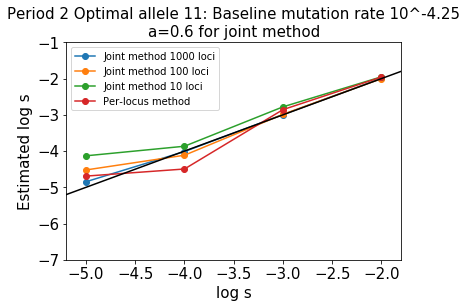

(a, number of loci, mean)
(0.6, 1000, 1e-05)
(0.6, 100, 1e-05)
(0.6, 10, 1e-05)
(0.6, 1000, 0.0001)
(0.6, 100, 0.0001)
(0.6, 10, 0.0001)
(0.6, 1000, 0.001)
(0.6, 100, 0.001)
(0.6, 10, 0.001)
(0.6, 1000, 0.01)
(0.6, 100, 0.01)
(0.6, 10, 0.01)
Means for 1000 loci
[-4.900443006613696, -3.9393297228425204, -2.9973496549936676, -2.00492677984331]
Means for 100 loci
[-3.968238913739108, -3.8972694181674785, -3.1162333420910766, -1.9845250363269455]
Means for 10 loci
[-3.5041586055778584, -3.4243171590686465, -3.351912575436643, -1.921954547943184]
Means for per-locus estimates
[-4.858370801824227, -4.838416657826514, -3.1503388591342536, -1.8997073628168533]


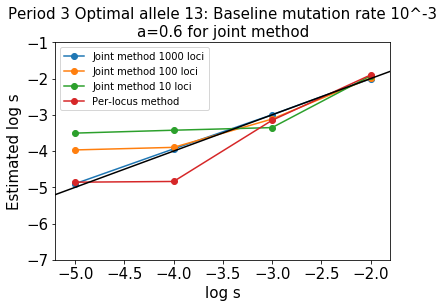

CPU times: user 8.31 s, sys: 106 ms, total: 8.41 s
Wall time: 9.31 s


In [3]:
%%time
if __name__ == '__main__':
    main()